# 📊 Análise Exploratória e Métricas do Modelo

**Projeto:** Predição de Risco de Defasagem Escolar - Passos Mágicos

**Datathon FIAP 2025** | Especialização em Machine Learning Engineering

---

## Sumário

1. [Setup e Carregamento dos Dados](#1-setup)
2. [Visão Geral do Dataset](#2-visao-geral)
3. [Análise Exploratória](#3-eda)
4. [Análise do Target](#4-target)
5. [Correlações](#5-correlacoes)
6. [Métricas do Modelo](#6-metricas)
7. [Comparação de Modelos](#7-comparacao)
8. [Conclusões](#8-conclusoes)

## 1. Setup e Carregamento dos Dados <a id='1-setup'></a>

In [2]:
# Imports
import pandas as pd
import numpy as np
import json
from pathlib import Path

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Cores personalizadas para o projeto
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'success': '#28A745',
    'warning': '#FFC107',
    'danger': '#DC3545',
    'info': '#17A2B8',
    'risk_high': '#DC3545',
    'risk_low': '#28A745'
}

print("✅ Bibliotecas carregadas com sucesso!")

✅ Bibliotecas carregadas com sucesso!


In [3]:
# Caminhos do projeto
PROJECT_ROOT = Path('.').resolve().parent
DATA_PATH = PROJECT_ROOT / 'data' / 'processed' / 'modeling_dataset.parquet'
ARTIFACTS_PATH = PROJECT_ROOT / 'artifacts'

print(f"📁 Raiz do projeto: {PROJECT_ROOT}")
print(f"📊 Dataset: {DATA_PATH}")
print(f"🔧 Artefatos: {ARTIFACTS_PATH}")

📁 Raiz do projeto: C:\Users\argus\workspace\datathonfiap
📊 Dataset: C:\Users\argus\workspace\datathonfiap\data\processed\modeling_dataset.parquet
🔧 Artefatos: C:\Users\argus\workspace\datathonfiap\artifacts


In [4]:
# Carregar dataset
df = pd.read_parquet(DATA_PATH)
print(f"✅ Dataset carregado: {df.shape[0]:,} linhas × {df.shape[1]} colunas")

✅ Dataset carregado: 765 linhas × 12 colunas


In [5]:
# Carregar metadados e métricas do modelo
with open(ARTIFACTS_PATH / 'model_metadata.json', 'r') as f:
    metadata = json.load(f)

with open(ARTIFACTS_PATH / 'metrics.json', 'r') as f:
    metrics = json.load(f)

# Features esperadas pelo modelo
FEATURES = metadata['expected_features']
print(f"✅ Metadados carregados")
print(f"📌 Modelo versão: {metadata['model_version']}")
print(f"📌 Features: {len(FEATURES)}")

✅ Metadados carregados
📌 Modelo versão: v1.0.0
📌 Features: 13


## 2. Visão Geral do Dataset <a id='2-visao-geral'></a>

In [6]:
# Primeiras linhas
df.head()

,ra,instituicao_2023,idade_2023,fase_2023,ian_2023,ida_2023,ieg_2023,iaa_2023,ips_2023,ipp_2023,ipv_2023,em_risco_2024
0,RA-861,Pública,8,ALFA,10.0000,9.6000,10.0000,9.5000,8.1300,8.4375,8.9200,1
1,RA-862,Pública,9,ALFA,5.0000,8.9000,9.1000,8.5000,8.1400,7.5000,8.5850,1
2,RA-863,Pública,7,ALFA,10.0000,6.3000,7.6000,0.0000,3.1400,5.9375,6.2600,1
3,RA-867,Pública,8,ALFA,10.0000,8.9000,8.6000,9.0000,8.7600,7.5000,8.4150,1
4,RA-868,Pública,1900-01-07,ALFA,10.0000,7.1000,9.5000,10.0000,8.7600,7.1875,8.6700,1


In [7]:
# Informações gerais
print("📋 INFORMAÇÕES DO DATASET")
print("=" * 50)
print(f"Linhas: {df.shape[0]:,}")
print(f"Colunas: {df.shape[1]}")
print(f"Memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print()
print("📊 TIPOS DE DADOS")
print(df.dtypes.value_counts())

📋 INFORMAÇÕES DO DATASET
Linhas: 765
Colunas: 12
Memória: 0.22 MB

📊 TIPOS DE DADOS
float64    7
object     4
int32      1
Name: count, dtype: int64


In [8]:
# Estatísticas descritivas
df.describe().round(2)

,ian_2023,ida_2023,ieg_2023,iaa_2023,ips_2023,ipp_2023,ipv_2023,em_risco_2024
count,765.0000,693.0000,693.0000,706.0000,703.0000,693.0000,693.0000,765.0000
mean,7.4100,6.8300,8.8600,7.0000,5.1600,7.6200,8.1200,0.4000
std,2.5200,1.4800,0.9700,3.5700,2.0900,0.9800,0.9200,0.4900
min,2.5000,2.2000,3.7000,0.0000,2.5200,4.3800,3.3200,0.0000
25%,5.0000,5.9000,8.3000,6.9300,2.5200,7.1900,7.5400,0.0000
50%,5.0000,6.9000,9.1000,8.5000,5.0000,7.7100,8.1200,0.0000
75%,10.0000,7.9000,9.6000,9.2000,7.5200,8.2800,8.7100,1.0000
max,10.0000,10.0000,10.0000,10.0000,9.3800,9.7900,10.0100,1.0000


In [9]:
# Valores ausentes
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Valores Ausentes': missing,
    'Porcentagem (%)': missing_pct
}).query('`Valores Ausentes` > 0').sort_values('Porcentagem (%)', ascending=False)

if len(missing_df) > 0:
    print("⚠️ VALORES AUSENTES ENCONTRADOS")
    display(missing_df)
else:
    print("✅ Nenhum valor ausente no dataset!")

⚠️ VALORES AUSENTES ENCONTRADOS


,Valores Ausentes,Porcentagem (%)
ida_2023,72,9.4100
ieg_2023,72,9.4100
ipp_2023,72,9.4100
ipv_2023,72,9.4100
ips_2023,62,8.1000
iaa_2023,59,7.7100


## 3. Análise Exploratória <a id='3-eda'></a>

### 3.1 Distribuição das Features

In [10]:
# Selecionar features numéricas disponíveis
available_features = [f for f in FEATURES if f in df.columns]
print(f"📊 Features disponíveis para análise: {len(available_features)}")
print(available_features)

📊 Features disponíveis para análise: 10
['fase_2023', 'iaa_2023', 'ian_2023', 'ida_2023', 'idade_2023', 'ieg_2023', 'instituicao_2023', 'ipp_2023', 'ips_2023', 'ipv_2023']


📊 Features numéricas para histogramas: 7


C:\Users\argus\AppData\Local\Temp\ipykernel_31500\2149176479.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


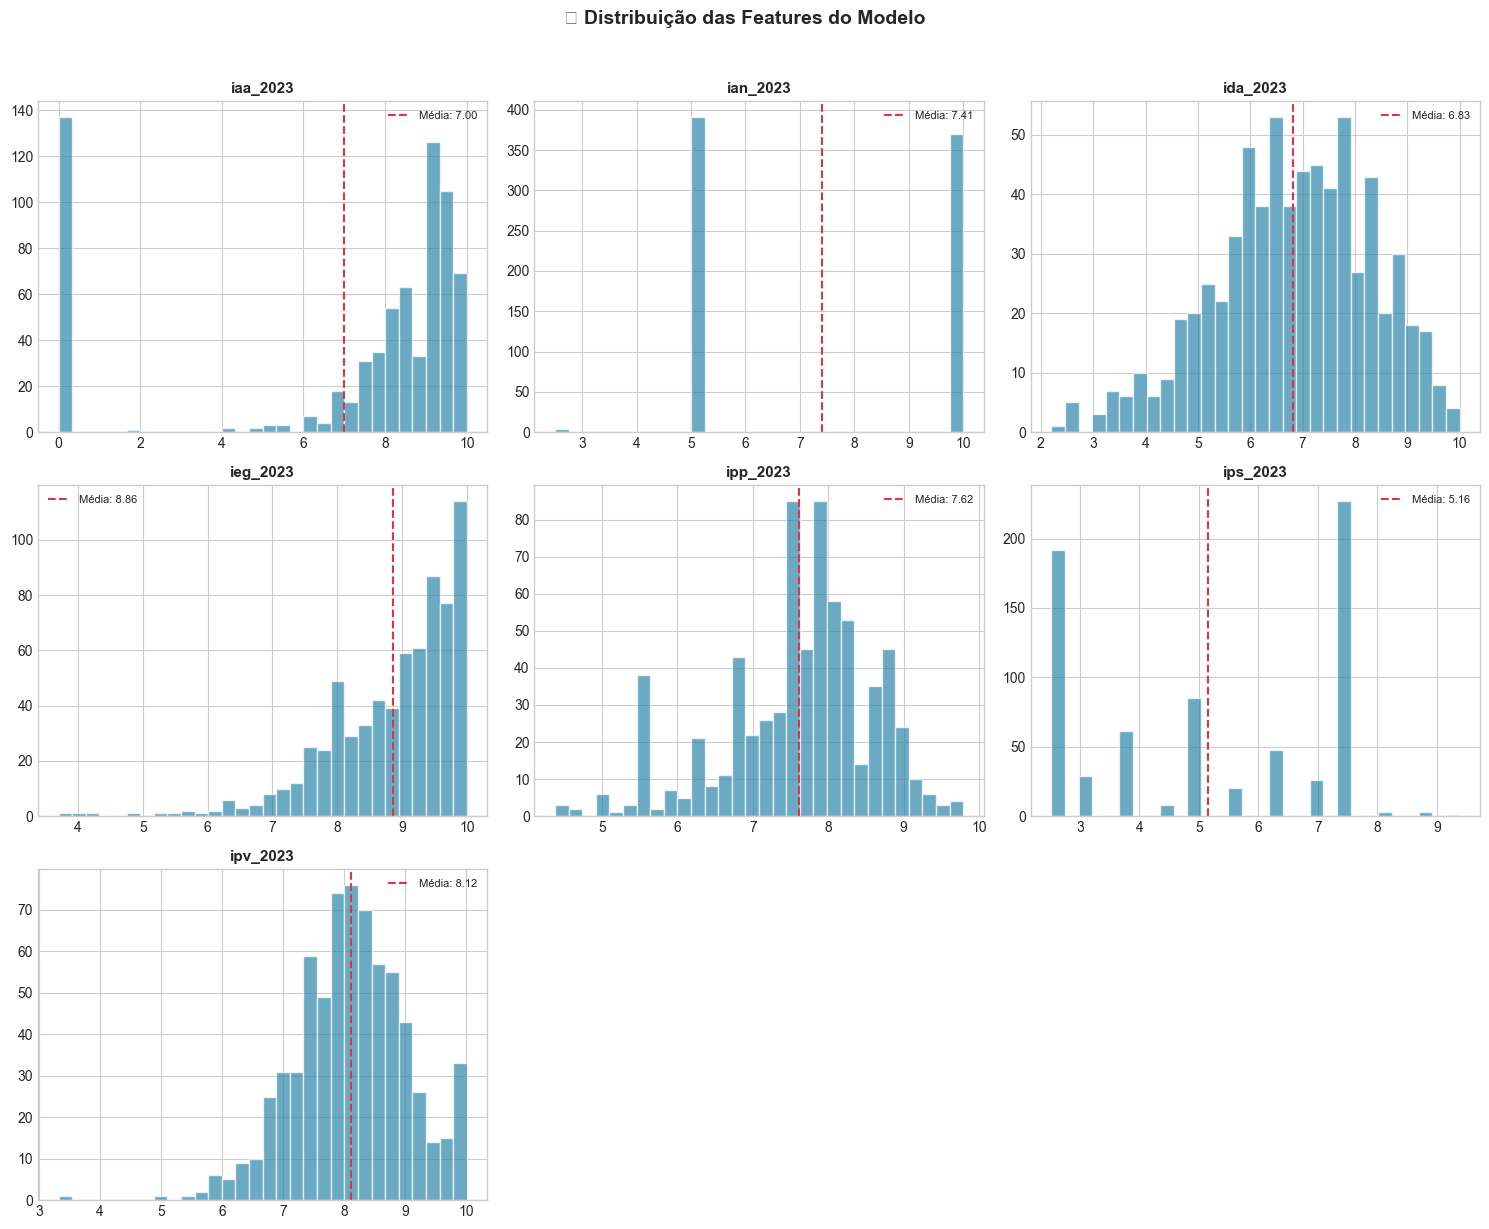

In [11]:
# Histogramas das features do modelo (apenas numéricas)
# Filtrar apenas features numéricas
numeric_features = [f for f in available_features if f in df.columns and pd.api.types.is_numeric_dtype(df[f])]
print(f"📊 Features numéricas para histogramas: {len(numeric_features)}")

n_features = len(numeric_features)
if n_features > 0:
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_features > 1 else [axes]

    for i, feature in enumerate(numeric_features):
        ax = axes[i]
        df[feature].hist(bins=30, ax=ax, color=COLORS['primary'], edgecolor='white', alpha=0.7)
        ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
        ax.set_xlabel('')
        ax.axvline(df[feature].mean(), color=COLORS['danger'], linestyle='--', label=f'Média: {df[feature].mean():.2f}')
        ax.legend(fontsize=8)

    # Remover subplots vazios
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.suptitle('📊 Distribuição das Features do Modelo', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Nenhuma feature numérica encontrada para plotar histogramas")

C:\Users\argus\AppData\Local\Temp\ipykernel_31500\31469810.py:19: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


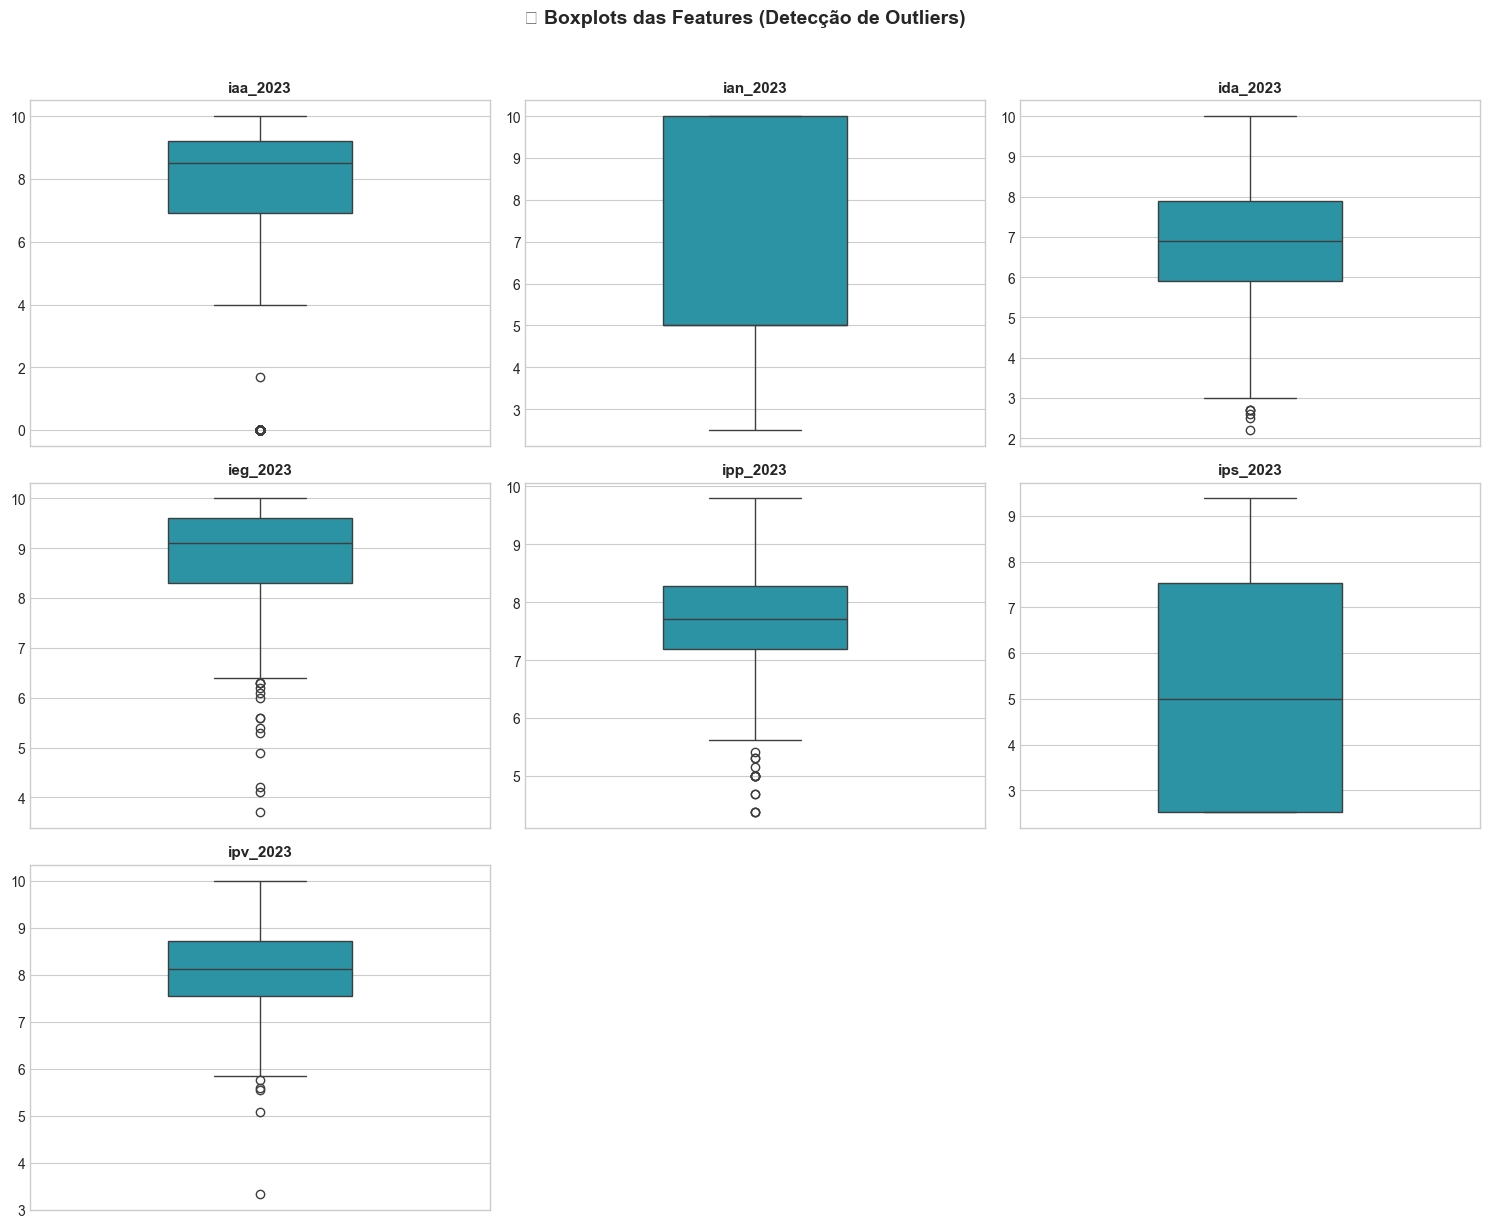

In [12]:
# Boxplots das features (apenas numéricas)
if len(numeric_features) > 0:
    n_cols = 3
    n_rows = (len(numeric_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if len(numeric_features) > 1 else [axes]

    for i, feature in enumerate(numeric_features):
        ax = axes[i]
        sns.boxplot(data=df, y=feature, ax=ax, color=COLORS['info'], width=0.4)
        ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
        ax.set_ylabel('')

    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.suptitle('📦 Boxplots das Features (Detecção de Outliers)', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Nenhuma feature numérica encontrada para plotar boxplots")

### 3.2 Análise por Fase Escolar

C:\Users\argus\AppData\Local\Temp\ipykernel_31500\294317626.py:35: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\argus\AppData\Local\Temp\ipykernel_31500\294317626.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


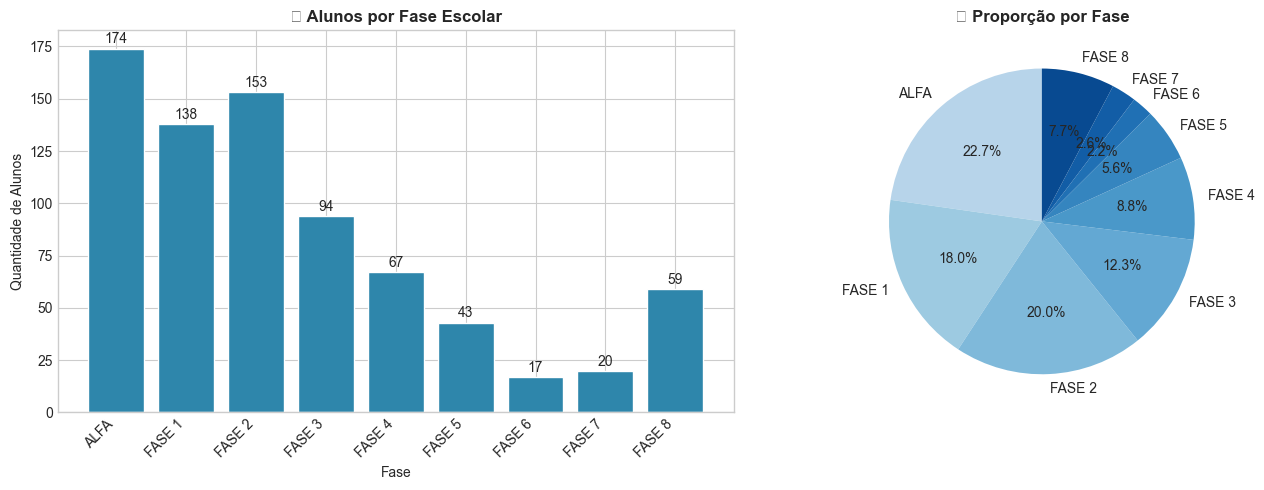


📊 Distribuição por Fase:
   • ALFA: 174 alunos (22.7%)
   • FASE 1: 138 alunos (18.0%)
   • FASE 2: 153 alunos (20.0%)
   • FASE 3: 94 alunos (12.3%)
   • FASE 4: 67 alunos (8.8%)
   • FASE 5: 43 alunos (5.6%)
   • FASE 6: 17 alunos (2.2%)
   • FASE 7: 20 alunos (2.6%)
   • FASE 8: 59 alunos (7.7%)


In [13]:
# Distribuição por fase
fase_col = 'fase_2023' if 'fase_2023' in df.columns else None

if fase_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Contagem por fase (funciona com strings ou números)
    fase_counts = df[fase_col].value_counts()
    # Ordenar: primeiro ALFA, depois FASE 1, FASE 2, etc.
    try:
        fase_counts = fase_counts.sort_index()
    except:
        pass  # Se não conseguir ordenar, mantém a ordem original
    
    ax1 = axes[0]
    bars = ax1.bar(range(len(fase_counts)), fase_counts.values, color=COLORS['primary'], edgecolor='white')
    ax1.set_xticks(range(len(fase_counts)))
    ax1.set_xticklabels([str(x) for x in fase_counts.index], rotation=45, ha='right')
    ax1.set_title('📚 Alunos por Fase Escolar', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Fase')
    ax1.set_ylabel('Quantidade de Alunos')
    
    # Adicionar valores nas barras
    for bar, val in zip(bars, fase_counts.values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(val), ha='center', va='bottom', fontsize=10)
    
    # Percentual
    ax2 = axes[1]
    colors_pie = plt.cm.Blues(np.linspace(0.3, 0.9, len(fase_counts)))
    ax2.pie(fase_counts.values, labels=[str(f) for f in fase_counts.index], 
            autopct='%1.1f%%', colors=colors_pie, startangle=90)
    ax2.set_title('📊 Proporção por Fase', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Distribuição por Fase:")
    for fase, count in fase_counts.items():
        print(f"   • {fase}: {count} alunos ({count/len(df)*100:.1f}%)")
else:
    print("⚠️ Coluna fase_2023 não encontrada")

### 3.3 Análise de Idade

In [14]:
# Distribuição de idade
# Procurar coluna de idade (pode ter nome diferente)
idade_col = None
for col in ['idade_2023', 'idade', 'IDADE_2023', 'IDADE']:
    if col in df.columns:
        idade_col = col
        break

if idade_col and pd.api.types.is_numeric_dtype(df[idade_col]):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histograma de idade
    ax1 = axes[0]
    df[idade_col].hist(bins=15, ax=ax1, color=COLORS['secondary'], edgecolor='white', alpha=0.7)
    ax1.axvline(df[idade_col].mean(), color=COLORS['danger'], linestyle='--', linewidth=2,
                label=f"Média: {df[idade_col].mean():.1f} anos")
    ax1.axvline(df[idade_col].median(), color=COLORS['warning'], linestyle=':', linewidth=2,
                label=f"Mediana: {df[idade_col].median():.1f} anos")
    ax1.set_title('🎂 Distribuição de Idade dos Alunos', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Idade (anos)')
    ax1.set_ylabel('Frequência')
    ax1.legend()
    
    # Idade por fase
    fase_col = 'fase_2023' if 'fase_2023' in df.columns else None
    if fase_col:
        ax2 = axes[1]
        # Criar ordem para as fases
        order = sorted(df[fase_col].unique(), key=lambda x: (0 if 'ALFA' in str(x).upper() else int(''.join(filter(str.isdigit, str(x))) or 99)))
        sns.boxplot(data=df, x=fase_col, y=idade_col, ax=ax2, palette='Blues', order=order)
        ax2.set_title('🎂 Idade por Fase Escolar', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Fase')
        ax2.set_ylabel('Idade (anos)')
        ax2.tick_params(axis='x', rotation=45)
    else:
        ax2.text(0.5, 0.5, 'Coluna de fase não encontrada', ha='center', va='center', transform=ax2.transAxes)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Estatísticas de Idade:")
    print(f"   • Mínima: {df[idade_col].min():.0f} anos")
    print(f"   • Máxima: {df[idade_col].max():.0f} anos")
    print(f"   • Média: {df[idade_col].mean():.1f} anos")
    print(f"   • Mediana: {df[idade_col].median():.0f} anos")
elif idade_col:
    print(f"⚠️ Coluna '{idade_col}' encontrada mas não é numérica (tipo: {df[idade_col].dtype})")
    print(f"   Valores únicos (amostra): {list(df[idade_col].unique()[:5])}...")
else:
    print("⚠️ Coluna de idade não encontrada no dataset")
    print(f"   Colunas disponíveis: {[c for c in df.columns if 'idade' in c.lower() or 'age' in c.lower()]}")

⚠️ Coluna 'idade_2023' encontrada mas não é numérica (tipo: object)
   Valores únicos (amostra): ['8', '9', '7', '1900-01-07', '1900-01-11']...


## 4. Análise do Target <a id='4-target'></a>

O target `em_risco` indica se o aluno está em risco de defasagem escolar.

In [28]:
# Identificar coluna de target
target_col = None

# Procurar target em ordem de prioridade
for col_name in ['em_risco_2024', 'em_risco', 'target', 'risco', 'defasagem']:
    if col_name in df.columns:
        target_col = col_name
        break

if target_col:
    print(f"✅ Target identificado: '{target_col}'")
    print(f"\n📊 Distribuição do Target:")
    print(df[target_col].value_counts())
else:
    print("⚠️ Coluna de target não encontrada no dataset")
    print(f"Colunas disponíveis: {df.columns.tolist()}")

✅ Target identificado: 'em_risco_2024'

📊 Distribuição do Target:
em_risco_2024
0    457
1    308
Name: count, dtype: int64


C:\Users\argus\AppData\Local\Temp\ipykernel_31500\4170484737.py:27: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\argus\AppData\Local\Temp\ipykernel_31500\4170484737.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


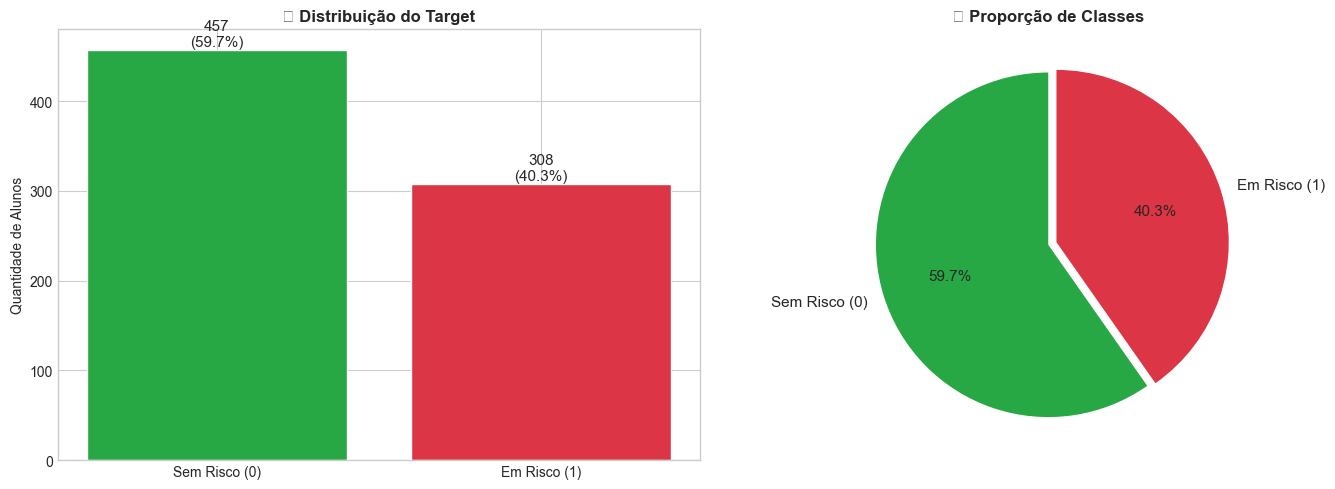


⚖️ Razão de Desbalanceamento: 1.48:1
✅ Dataset relativamente balanceado


In [29]:
# Distribuição do target
if target_col and target_col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Contagem
    target_counts = df[target_col].value_counts().sort_index()
    labels = ['Sem Risco (0)', 'Em Risco (1)'] if len(target_counts) == 2 else [f'Classe {i}' for i in target_counts.index]
    colors_bar = [COLORS['success'], COLORS['danger']] if len(target_counts) == 2 else [COLORS['primary']]*len(target_counts)
    
    ax1 = axes[0]
    bars = ax1.bar(labels[:len(target_counts)], target_counts.values, color=colors_bar[:len(target_counts)], edgecolor='white')
    ax1.set_title('🎯 Distribuição do Target', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Quantidade de Alunos')
    
    for bar, val in zip(bars, target_counts.values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{val}\n({val/len(df)*100:.1f}%)', ha='center', va='bottom', fontsize=11)
    
    # Pizza
    ax2 = axes[1]
    explode = (0, 0.05) if len(target_counts) == 2 else [0]*len(target_counts)
    ax2.pie(target_counts.values, labels=labels[:len(target_counts)], autopct='%1.1f%%',
            colors=colors_bar[:len(target_counts)], explode=explode[:len(target_counts)], startangle=90,
            textprops={'fontsize': 11})
    ax2.set_title('📊 Proporção de Classes', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Imbalance ratio
    if len(target_counts) == 2:
        imbalance = target_counts.max() / target_counts.min()
        print(f"\n⚖️ Razão de Desbalanceamento: {imbalance:.2f}:1")
        if imbalance > 3:
            print("⚠️ Dataset desbalanceado - considerar técnicas de balanceamento")
        else:
            print("✅ Dataset relativamente balanceado")

C:\Users\argus\AppData\Local\Temp\ipykernel_31500\4268260958.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()


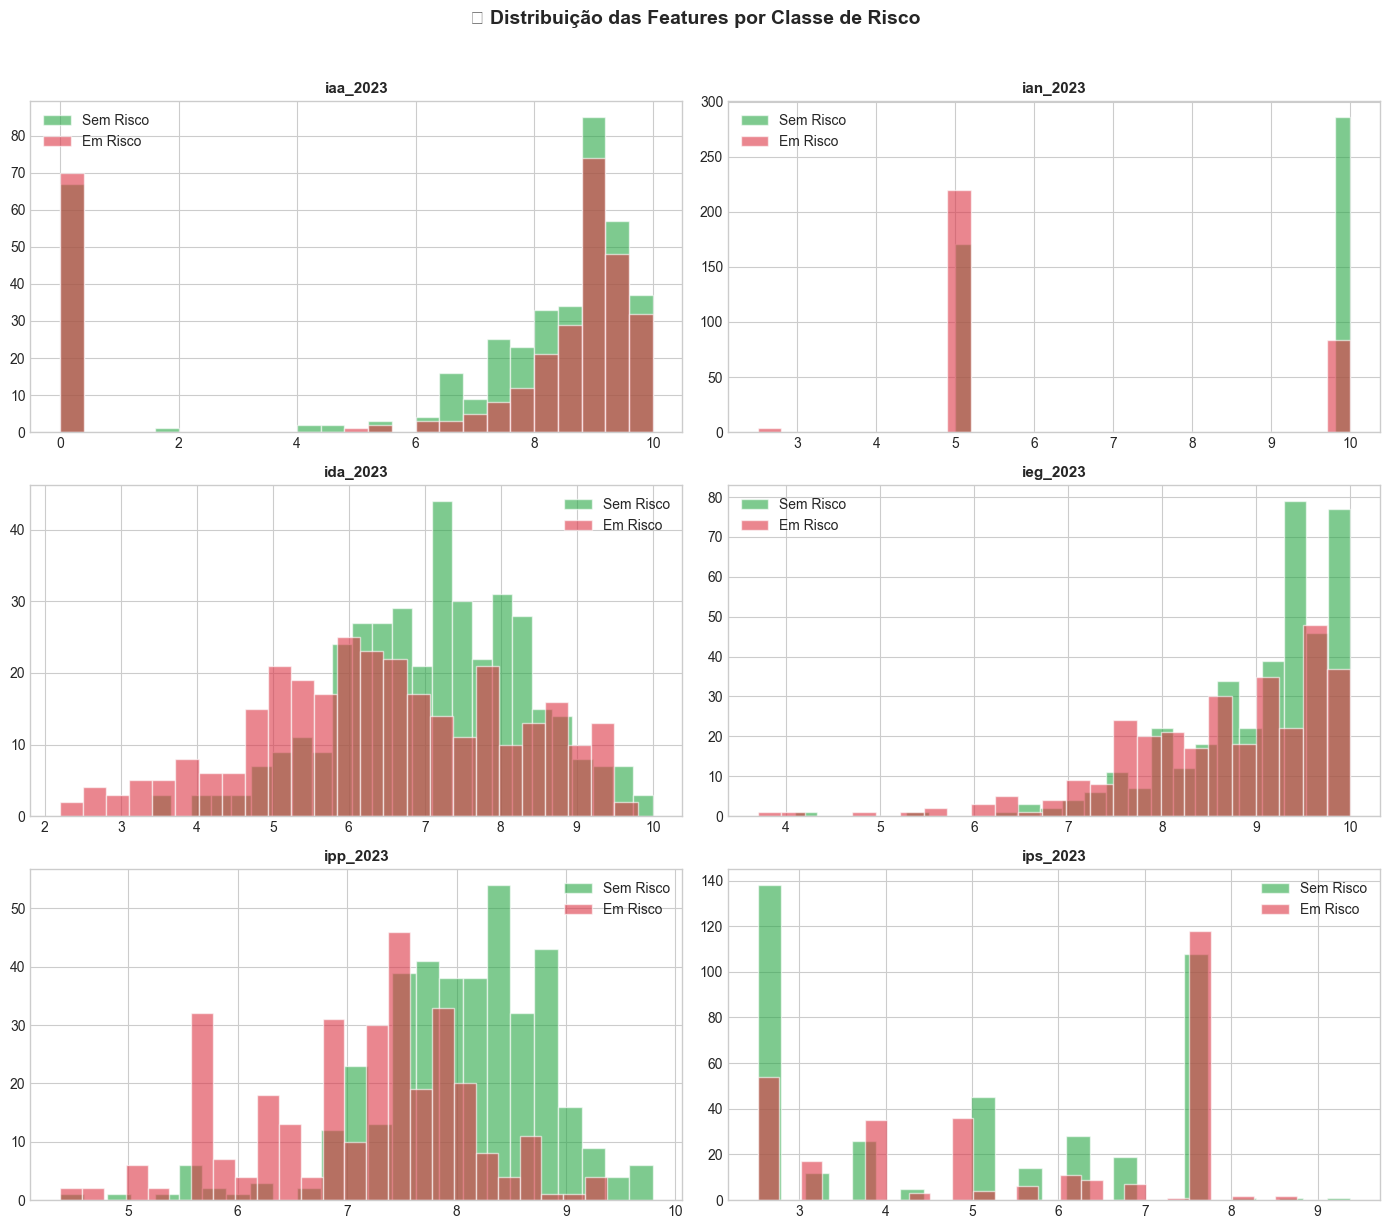

In [31]:
# Features vs Target
if target_col and target_col in df.columns:
    # Selecionar features numéricas para análise
    numeric_features = [f for f in available_features if f in df.columns and df[f].dtype in ['int64', 'float64']]
    
    n_features = min(len(numeric_features), 6)  # Limitar a 6 features
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten()
    
    for i, feature in enumerate(numeric_features[:n_features]):
        ax = axes[i]
        for target_val, color in zip([0, 1], [COLORS['success'], COLORS['danger']]):
            subset = df[df[target_col] == target_val][feature]
            label = 'Sem Risco' if target_val == 0 else 'Em Risco'
            subset.hist(bins=25, ax=ax, alpha=0.6, label=label, color=color, edgecolor='white')
        ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
        ax.legend()
        ax.set_xlabel('')
    
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('📊 Distribuição das Features por Classe de Risco', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

## 5. Correlações <a id='5-correlacoes'></a>

📊 Features numéricas para correlação: 8
   ['iaa_2023', 'ian_2023', 'ida_2023', 'ieg_2023', 'ipp_2023', 'ips_2023', 'ipv_2023', 'em_risco_2024']


C:\Users\argus\AppData\Local\Temp\ipykernel_31500\2083255144.py:24: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


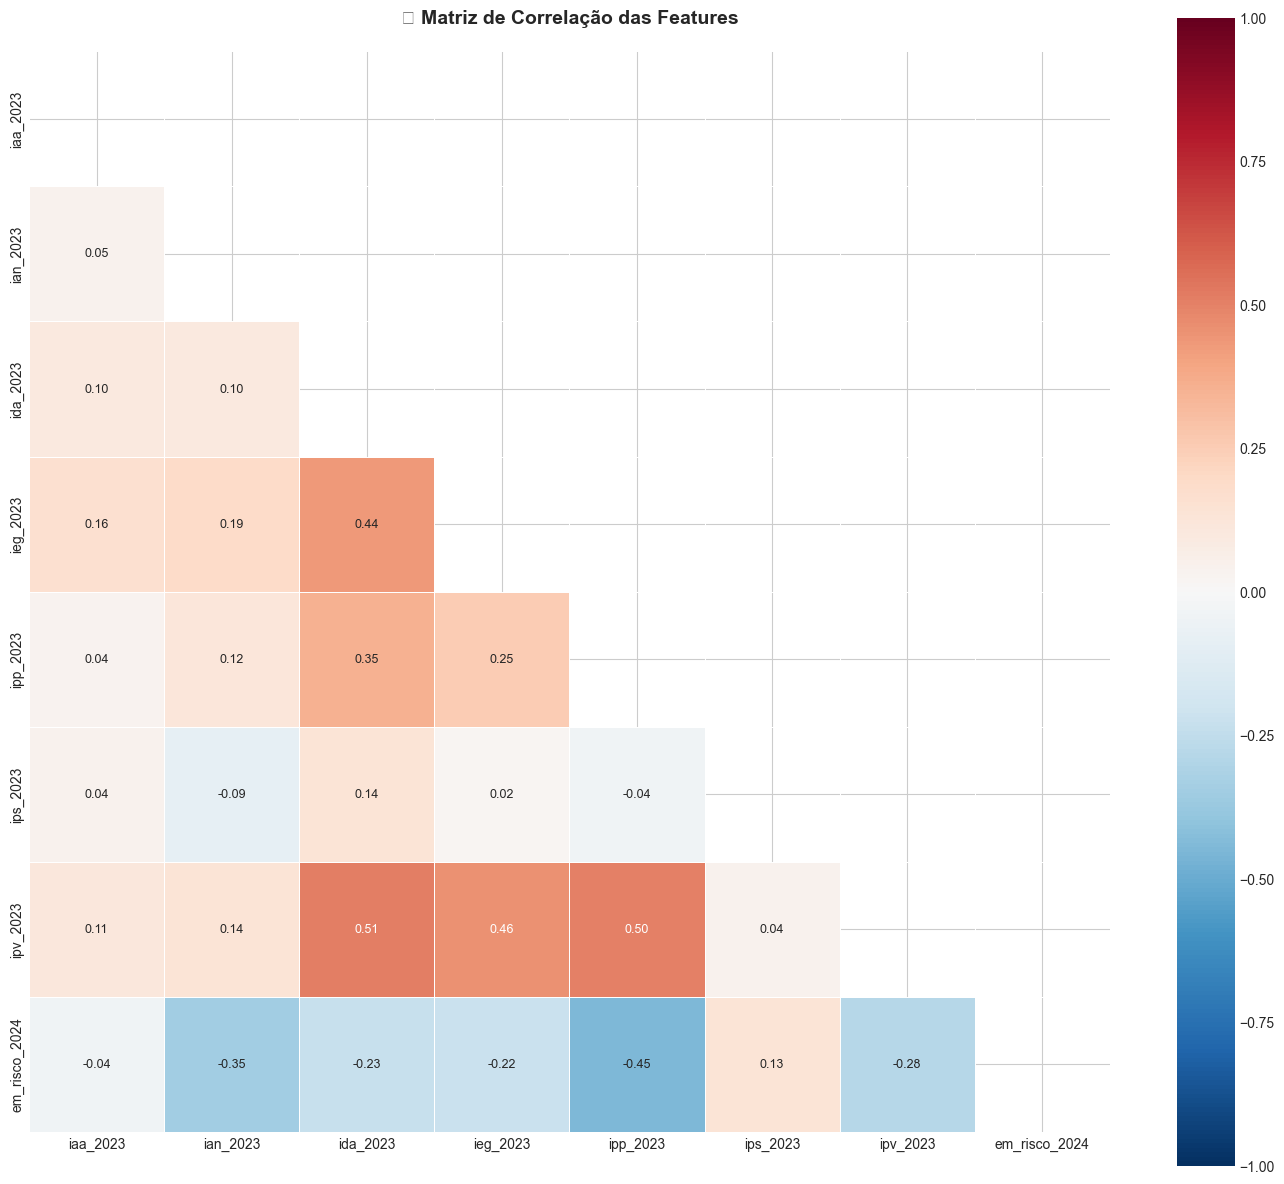

In [32]:
# Matriz de correlação (APENAS features numéricas)
# Filtrar apenas colunas numéricas das features disponíveis
numeric_correlation_features = [f for f in available_features 
                                 if f in df.columns and pd.api.types.is_numeric_dtype(df[f])]

# Adicionar target se for numérico
if target_col and target_col in df.columns and pd.api.types.is_numeric_dtype(df[target_col]):
    if target_col not in numeric_correlation_features:
        numeric_correlation_features.append(target_col)

print(f"📊 Features numéricas para correlação: {len(numeric_correlation_features)}")
print(f"   {numeric_correlation_features}")

if len(numeric_correlation_features) > 1:
    corr_matrix = df[numeric_correlation_features].corr()

    # Heatmap
    fig, ax = plt.subplots(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
                center=0, square=True, linewidths=0.5, ax=ax,
                annot_kws={'size': 9}, vmin=-1, vmax=1)
    ax.set_title('🔗 Matriz de Correlação das Features', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Não há features numéricas suficientes para calcular correlação")
    corr_matrix = None

C:\Users\argus\AppData\Local\Temp\ipykernel_31500\840483942.py:19: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


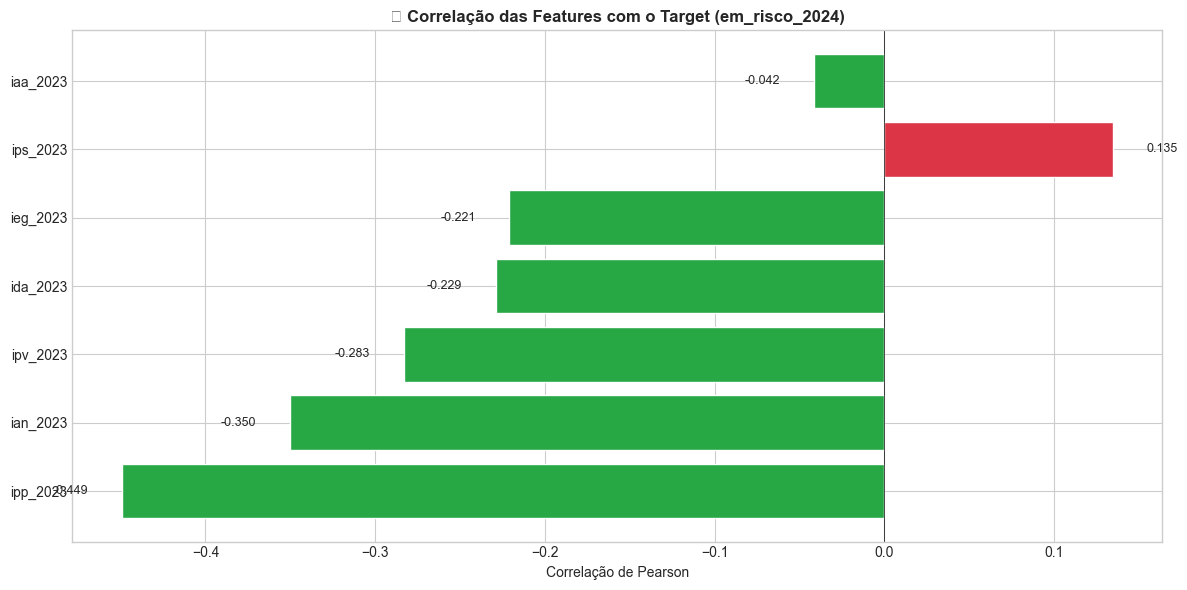


📊 Top 5 Features mais correlacionadas com o risco:
  1. ipp_2023: -0.4493 (📉 Negativa)
  2. ian_2023: -0.3502 (📉 Negativa)
  3. ipv_2023: -0.2832 (📉 Negativa)
  4. ida_2023: -0.2288 (📉 Negativa)
  5. ieg_2023: -0.2209 (📉 Negativa)


In [33]:
# Top correlações com o target
if corr_matrix is not None and target_col and target_col in corr_matrix.columns:
    target_corr = corr_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = [COLORS['danger'] if x > 0 else COLORS['success'] for x in target_corr.values]
    bars = ax.barh(target_corr.index, target_corr.values, color=colors, edgecolor='white')
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_title(f'🎯 Correlação das Features com o Target ({target_col})', fontsize=12, fontweight='bold')
    ax.set_xlabel('Correlação de Pearson')
    
    # Adicionar valores
    for bar, val in zip(bars, target_corr.values):
        x_pos = val + 0.02 if val > 0 else val - 0.02
        ha = 'left' if val > 0 else 'right'
        ax.text(x_pos, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
                ha=ha, va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Top 5 Features mais correlacionadas com o risco:")
    for i, (feature, corr) in enumerate(target_corr.head().items(), 1):
        direction = '📈 Positiva' if corr > 0 else '📉 Negativa'
        print(f"  {i}. {feature}: {corr:.4f} ({direction})")
elif corr_matrix is None:
    print("⚠️ Matriz de correlação não disponível")
else:
    print(f"⚠️ Target '{target_col}' não está na matriz de correlação (não é numérico?)")

## 6. Métricas do Modelo <a id='6-metricas'></a>

Análise das métricas do modelo treinado.

In [34]:
# Informações do modelo
print("🤖 INFORMAÇÕES DO MODELO")
print("=" * 50)
print(f"Versão: {metadata['model_version']}")
print(f"Criado em: {metadata['created_at']}")
print(f"scikit-learn: {metadata['sklearn_version']}")
print(f"Períodos de treino: {metadata['training_periods']}")
print(f"\n📌 Definição do Target:")
print(f"   {metadata['target_definition']}")
print(f"\n🎯 Política de Threshold:")
print(f"   Objetivo: {metadata['threshold_policy']['objective']}")
print(f"   Valor: {metadata['threshold_policy']['threshold_value']:.6f}")

🤖 INFORMAÇÕES DO MODELO
Versão: v1.0.0
Criado em: 2026-01-15T16:46:49.474045
scikit-learn: 1.8.0
Períodos de treino: ['2023->2024']

📌 Definição do Target:
   em_risco = 1 se Defasagem < 0 (aluno atrasado)

🎯 Política de Threshold:
   Objetivo: max_recall
   Valor: 0.001186


In [35]:
# Métricas do melhor modelo
best_model = metrics['best_model']
best_metrics = metrics['baselines'][best_model]

print(f"🏆 MELHOR MODELO: {best_model}")
print("=" * 50)
print(f"\n📊 Métricas de Classificação:")
print(f"   • Recall:     {best_metrics['recall']:.4f} ({best_metrics['recall']*100:.1f}%)")
print(f"   • Precision:  {best_metrics['precision']:.4f} ({best_metrics['precision']*100:.1f}%)")
print(f"   • F1-Score:   {best_metrics['f1']:.4f}")
print(f"   • F2-Score:   {best_metrics['f2']:.4f}")
print(f"   • PR-AUC:     {best_metrics['pr_auc']:.4f}")
print(f"\n📈 Dataset de Avaliação:")
print(f"   • Total: {best_metrics['n_samples']} amostras")
print(f"   • Positivos (em risco): {best_metrics['n_positive']} ({best_metrics['baseline_rate']*100:.1f}%)")
print(f"   • Negativos (sem risco): {best_metrics['n_negative']} ({(1-best_metrics['baseline_rate'])*100:.1f}%)")

🏆 MELHOR MODELO: baseline1_logistic

📊 Métricas de Classificação:
   • Recall:     1.0000 (100.0%)
   • Precision:  0.4052 (40.5%)
   • F1-Score:   0.5767
   • F2-Score:   0.7731
   • PR-AUC:     0.8916

📈 Dataset de Avaliação:
   • Total: 153 amostras
   • Positivos (em risco): 62 (40.5%)
   • Negativos (sem risco): 91 (59.5%)


c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\argus\AppData\Local\Temp\ipykernel_31500\1398761800.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


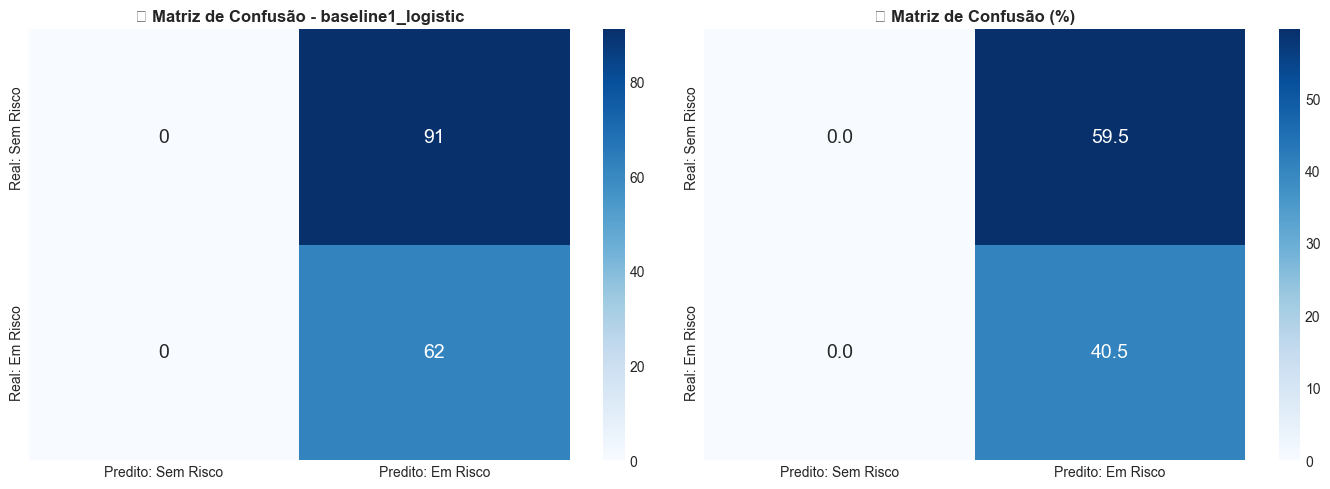


📋 INTERPRETAÇÃO DA MATRIZ DE CONFUSÃO
✅ Verdadeiros Negativos (TN): 0 - Alunos sem risco classificados corretamente
⚠️ Falsos Positivos (FP): 91 - Alunos sem risco classificados como em risco
❌ Falsos Negativos (FN): 0 - Alunos em risco não detectados
✅ Verdadeiros Positivos (TP): 62 - Alunos em risco detectados corretamente


In [36]:
# Matriz de confusão do melhor modelo
cm = np.array(best_metrics['confusion_matrix'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de confusão - valores absolutos
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Predito: Sem Risco', 'Predito: Em Risco'],
            yticklabels=['Real: Sem Risco', 'Real: Em Risco'],
            annot_kws={'size': 14})
ax1.set_title(f'📊 Matriz de Confusão - {best_model}', fontsize=12, fontweight='bold')

# Matriz de confusão - percentuais
ax2 = axes[1]
cm_pct = cm.astype('float') / cm.sum() * 100
sns.heatmap(cm_pct, annot=True, fmt='.1f', cmap='Blues', ax=ax2,
            xticklabels=['Predito: Sem Risco', 'Predito: Em Risco'],
            yticklabels=['Real: Sem Risco', 'Real: Em Risco'],
            annot_kws={'size': 14})
ax2.set_title('📊 Matriz de Confusão (%)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Interpretação
print("\n📋 INTERPRETAÇÃO DA MATRIZ DE CONFUSÃO")
print("=" * 50)
print(f"✅ Verdadeiros Negativos (TN): {best_metrics['true_negatives']} - Alunos sem risco classificados corretamente")
print(f"⚠️ Falsos Positivos (FP): {best_metrics['false_positives']} - Alunos sem risco classificados como em risco")
print(f"❌ Falsos Negativos (FN): {best_metrics['false_negatives']} - Alunos em risco não detectados")
print(f"✅ Verdadeiros Positivos (TP): {best_metrics['true_positives']} - Alunos em risco detectados corretamente")

C:\Users\argus\AppData\Local\Temp\ipykernel_31500\3046725664.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()


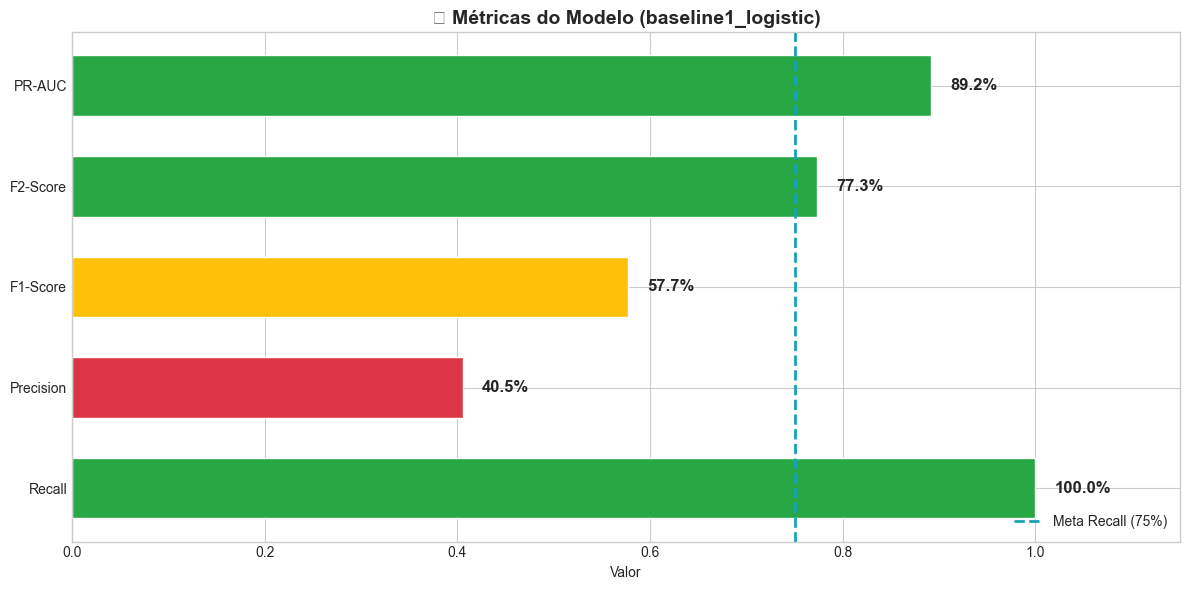

In [37]:
# Visualização das métricas principais
metrics_names = ['Recall', 'Precision', 'F1-Score', 'F2-Score', 'PR-AUC']
metrics_values = [
    best_metrics['recall'],
    best_metrics['precision'],
    best_metrics['f1'],
    best_metrics['f2'],
    best_metrics['pr_auc']
]

fig, ax = plt.subplots(figsize=(12, 6))

colors = [COLORS['success'] if v >= 0.7 else COLORS['warning'] if v >= 0.5 else COLORS['danger'] for v in metrics_values]
bars = ax.barh(metrics_names, metrics_values, color=colors, edgecolor='white', height=0.6)

# Linha de referência
ax.axvline(0.75, color=COLORS['info'], linestyle='--', linewidth=2, label='Meta Recall (75%)')

# Valores nas barras
for bar, val in zip(bars, metrics_values):
    ax.text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.1%}',
            ha='left', va='center', fontsize=12, fontweight='bold')

ax.set_xlim(0, 1.15)
ax.set_title(f'📊 Métricas do Modelo ({best_model})', fontsize=14, fontweight='bold')
ax.set_xlabel('Valor')
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

## 7. Comparação de Modelos <a id='7-comparacao'></a>

In [38]:
# Preparar dados para comparação
baselines = metrics['baselines']
model_names = list(baselines.keys())

comparison_data = []
for name, m in baselines.items():
    comparison_data.append({
        'Modelo': name.replace('baseline', 'Baseline ').replace('_', ' ').title(),
        'Recall': m['recall'],
        'Precision': m['precision'],
        'F1': m['f1'],
        'F2': m['f2'],
        'PR-AUC': m['pr_auc'],
        'Threshold': m['threshold']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index('Modelo', inplace=True)

# Estilizar tabela
styled = comparison_df.style.background_gradient(cmap='RdYlGn', subset=['Recall', 'Precision', 'F1', 'F2', 'PR-AUC'])
styled = styled.format({
    'Recall': '{:.1%}',
    'Precision': '{:.1%}',
    'F1': '{:.4f}',
    'F2': '{:.4f}',
    'PR-AUC': '{:.4f}',
    'Threshold': '{:.6f}'
})

print("📊 COMPARAÇÃO DE MODELOS")
print("=" * 50)
display(styled)

📊 COMPARAÇÃO DE MODELOS


,Recall,Precision,F1,F2,PR-AUC,Threshold
Modelo,,,,,,
Baseline 0 Naive,0.0%,0.0%,0.0000,0.0000,0.4052,0.500000
Baseline 1 Logistic,100.0%,40.5%,0.5767,0.7731,0.8916,0.001186
Baseline 2 Rf,100.0%,40.5%,0.5767,0.7731,0.8473,0.000193


C:\Users\argus\AppData\Local\Temp\ipykernel_31500\906183340.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


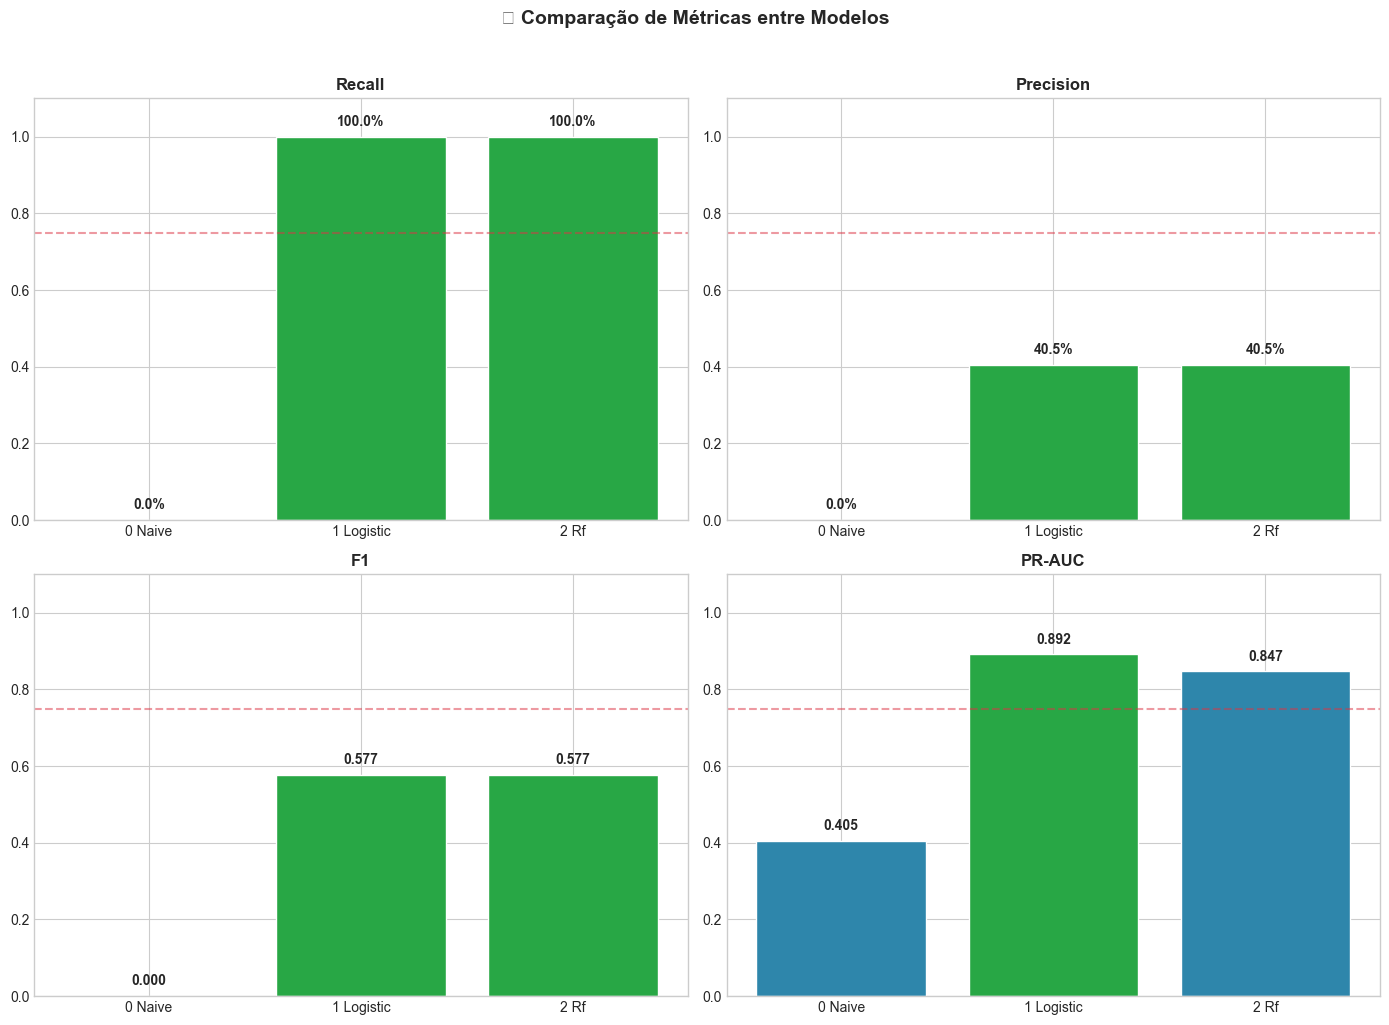

In [39]:
# Gráfico de comparação
metrics_to_compare = ['Recall', 'Precision', 'F1', 'PR-AUC']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

model_display_names = [m.replace('baseline', '').replace('_', ' ').strip().title() for m in model_names]

for i, metric in enumerate(metrics_to_compare):
    ax = axes[i]
    values = comparison_df[metric].values
    
    colors = [COLORS['success'] if v == values.max() else COLORS['primary'] for v in values]
    bars = ax.bar(model_display_names, values, color=colors, edgecolor='white')
    
    ax.set_title(f'{metric}', fontsize=12, fontweight='bold')
    ax.set_ylim(0, 1.1)
    
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{val:.1%}' if metric in ['Recall', 'Precision'] else f'{val:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.axhline(0.75, color=COLORS['danger'], linestyle='--', alpha=0.5, label='Meta 75%')

plt.suptitle('📊 Comparação de Métricas entre Modelos', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

C:\Users\argus\AppData\Local\Temp\ipykernel_31500\4268149355.py:31: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\argus\workspace\datathonfiap\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


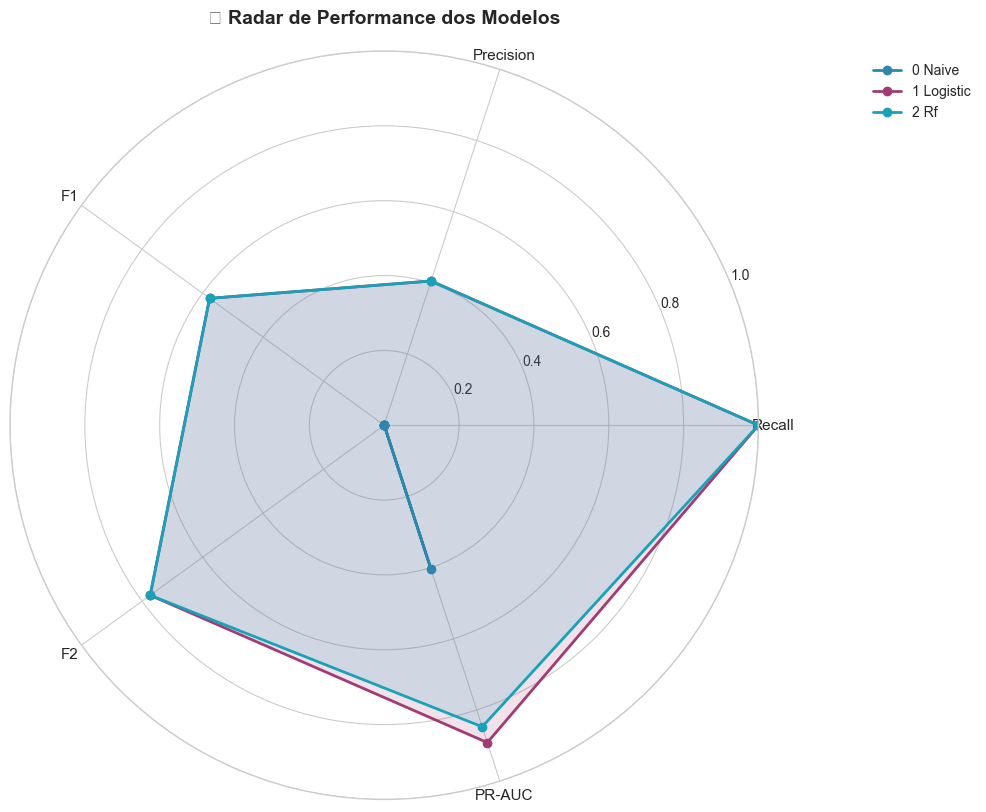

In [40]:
# Radar chart para comparação
from math import pi

# Preparar dados para radar
categories = ['Recall', 'Precision', 'F1', 'F2', 'PR-AUC']
N = len(categories)

# Ângulos
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Fechar o círculo

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Cores para cada modelo
model_colors = [COLORS['primary'], COLORS['secondary'], COLORS['info']]

for idx, (model_name, model_metrics) in enumerate(baselines.items()):
    values = [model_metrics[cat.lower().replace('-', '_')] for cat in categories]
    values += values[:1]  # Fechar o círculo
    
    display_name = model_name.replace('baseline', '').replace('_', ' ').strip().title()
    ax.plot(angles, values, 'o-', linewidth=2, label=display_name, color=model_colors[idx % len(model_colors)])
    ax.fill(angles, values, alpha=0.15, color=model_colors[idx % len(model_colors)])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11)
ax.set_ylim(0, 1)
ax.set_title('🎯 Radar de Performance dos Modelos', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

## 8. Conclusões <a id='8-conclusoes'></a>

In [41]:
# Resumo final
print("="*60)
print("📋 RESUMO DA ANÁLISE EXPLORATÓRIA E MODELO")
print("="*60)

print("\n📊 DATASET:")
print(f"   • {df.shape[0]:,} alunos analisados")
print(f"   • {len(available_features)} features no modelo")
print(f"   • {len(numeric_features)} features numéricas")
if target_col and target_col in df.columns:
    target_counts = df[target_col].value_counts()
    risk_pct = target_counts.get(1, 0) / len(df) * 100
    print(f"   • {risk_pct:.1f}% dos alunos em situação de risco")

print("\n🤖 MODELO:")
print(f"   • Versão: {metadata['model_version']}")
print(f"   • Melhor modelo: {best_model}")
print(f"   • Recall: {best_metrics['recall']:.1%} ✅" if best_metrics['recall'] >= 0.75 else f"   • Recall: {best_metrics['recall']:.1%} ⚠️")
print(f"   • PR-AUC: {best_metrics['pr_auc']:.4f}")

print("\n🎯 PRINCIPAIS INSIGHTS:")
if corr_matrix is not None and target_col and target_col in corr_matrix.columns:
    top_features = corr_matrix[target_col].drop(target_col).abs().sort_values(ascending=False).head(3)
    print(f"   • Features mais correlacionadas: {', '.join(top_features.index.tolist())}")
else:
    print("   • Análise de correlação não disponível (features não numéricas)")

print(f"   • Threshold otimizado para maximizar recall")
print(f"   • Modelo prioriza identificar todos os alunos em risco")

print("\n✅ PRÓXIMOS PASSOS RECOMENDADOS:")
print("   1. Monitorar drift das features em produção")
print("   2. Coletar feedback das intervenções realizadas")
print("   3. Retreinar modelo com novos dados periodicamente")
print("   4. Avaliar impacto das intervenções baseadas no modelo")

print("\n" + "="*60)
print("🎓 Datathon FIAP 2025 - Passos Mágicos")
print("="*60)

📋 RESUMO DA ANÁLISE EXPLORATÓRIA E MODELO

📊 DATASET:
   • 765 alunos analisados
   • 10 features no modelo
   • 7 features numéricas
   • 40.3% dos alunos em situação de risco

🤖 MODELO:
   • Versão: v1.0.0
   • Melhor modelo: baseline1_logistic
   • Recall: 100.0% ✅
   • PR-AUC: 0.8916

🎯 PRINCIPAIS INSIGHTS:
   • Features mais correlacionadas: ipp_2023, ian_2023, ipv_2023
   • Threshold otimizado para maximizar recall
   • Modelo prioriza identificar todos os alunos em risco

✅ PRÓXIMOS PASSOS RECOMENDADOS:
   1. Monitorar drift das features em produção
   2. Coletar feedback das intervenções realizadas
   3. Retreinar modelo com novos dados periodicamente
   4. Avaliar impacto das intervenções baseadas no modelo

🎓 Datathon FIAP 2025 - Passos Mágicos
